In [1]:
#take the top 40 countries by global mean across time, then plot their mean interactions between countries
#take these communities, then their mean in-degree per year
#plot scatters 

#trying directed but with means. do drop 0 or something to only get exports? 

#for 2012 and some other years, one community, otherwise one big community and smaller ones 

#for top 10, 2010 has a smaller big community 


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%reload_ext autoreload
%autoreload 2
import scipy.stats as st
import os
from scipy.optimize import curve_fit
import igraph as ig
import csv

import powerlaw as pl

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



In [3]:
df = pd.read_csv('/Users/ahazarie/Desktop/U of R/Fall 2016/PHY525/Project Stuff/Data/raw/year_origin_destination_hs07_4.tsv',sep='\t')

In [4]:
df = df.fillna(0)
df = df[df['export_val'] > 0]
df = df[df['hs07'] == 2709]

In [5]:
#calculate mean in-degree for each origin country across all transactions, partners, and time 
mean_time = df.groupby(['origin']).mean().reset_index()

In [6]:
#take the top 40
top = mean_time.sort_values('import_val')[-40:]['origin']


In [7]:
#only look at DF with origin and dest in the top 40
df = df[(df['origin'].isin(top)) & (df['dest'].isin(top))]

In [8]:
#take the mean interaction between each country for each year 
mean = df[df['export_val'] > 0].groupby(['origin','dest','year']).mean().reset_index()

In [9]:
#filter out the xx "countries" (represent groups?)
filtered = mean[(~mean['origin'].str.contains("xx") & (~mean['dest'].str.contains("xx")))]
filtered = filtered[filtered['export_val'] > 0]

#normalize
filtered['export_val'] = filtered['export_val']/max(filtered['export_val'])

In [10]:
pairs_2008 = np.array(filtered[['origin','dest','export_val']][filtered['year']==2008].values)

pairs_2009 = np.array(filtered[['origin','dest','export_val']][filtered['year']==2009].values)

pairs_2010 = np.array(filtered[['origin','dest','export_val']][filtered['year']==2010].values)

pairs_2011 = np.array(filtered[['origin','dest','export_val']][filtered['year']==2011].values)

pairs_2012 = np.array(filtered[['origin','dest','export_val']][filtered['year']==2012].values)

pairs_2013 = np.array(filtered[['origin','dest','export_val']][filtered['year']==2013].values)

pairs_2014 = np.array(filtered[['origin','dest','export_val']][filtered['year']==2014].values)


In [11]:
graph_2008 = ig.Graph.TupleList(pairs_2008, directed = True, weights=True)
graph_2008.vs['label'] = graph_2008.vs['name']

graph_2009 = ig.Graph.TupleList(pairs_2009, directed = True, weights=True)
graph_2009.vs['label'] = graph_2009.vs['name']

graph_2010 = ig.Graph.TupleList(pairs_2010, directed = True, weights=True)
graph_2010.vs['label'] = graph_2010.vs['name']

graph_2011 = ig.Graph.TupleList(pairs_2011, directed = True, weights=True)
graph_2011.vs['label'] = graph_2011.vs['name']

graph_2012 = ig.Graph.TupleList(pairs_2012, directed = True, weights=True)
graph_2012.vs['label'] = graph_2012.vs['name']

graph_2013 = ig.Graph.TupleList(pairs_2013, directed = True, weights=True)
graph_2013.vs['label'] = graph_2013.vs['name']

graph_2014 = ig.Graph.TupleList(pairs_2014, directed = True, weights=True)
graph_2014.vs['label'] = graph_2014.vs['name']


In [12]:
edge_weights_2008 = np.array(graph_2008.es['weight']).astype('float')
edge_weights_2009 = np.array(graph_2009.es['weight']).astype('float')
edge_weights_2010 = np.array(graph_2010.es['weight']).astype('float')
edge_weights_2011 = np.array(graph_2011.es['weight']).astype('float')
edge_weights_2012 = np.array(graph_2012.es['weight']).astype('float')
edge_weights_2013 = np.array(graph_2013.es['weight']).astype('float')
edge_weights_2014 = np.array(graph_2014.es['weight']).astype('float')


In [13]:
cmm_2008 = graph_2008.community_edge_betweenness(weights = edge_weights_2008, directed = True)
cmm_2009 = graph_2009.community_edge_betweenness(weights = edge_weights_2009, directed = True)
cmm_2010 = graph_2010.community_edge_betweenness(weights = edge_weights_2010, directed = True)
cmm_2011 = graph_2011.community_edge_betweenness(weights = edge_weights_2011, directed = True)
cmm_2012 = graph_2012.community_edge_betweenness(weights = edge_weights_2012, directed = True)
cmm_2013 = graph_2013.community_edge_betweenness(weights = edge_weights_2013, directed = True)
cmm_2014 = graph_2014.community_edge_betweenness(weights = edge_weights_2014, directed = True)


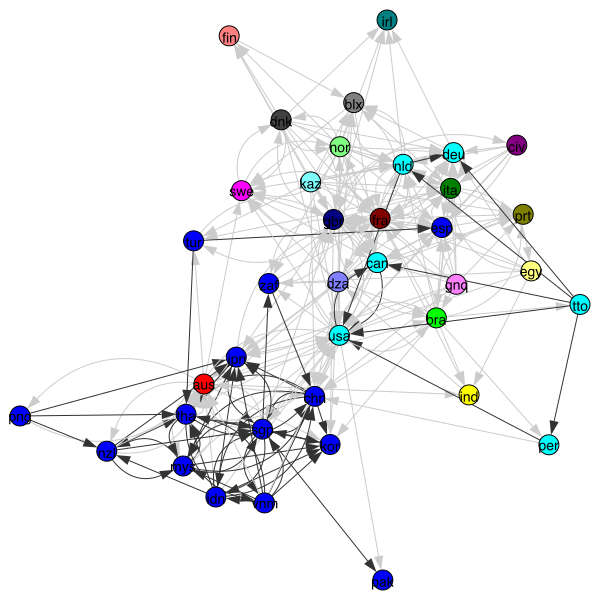

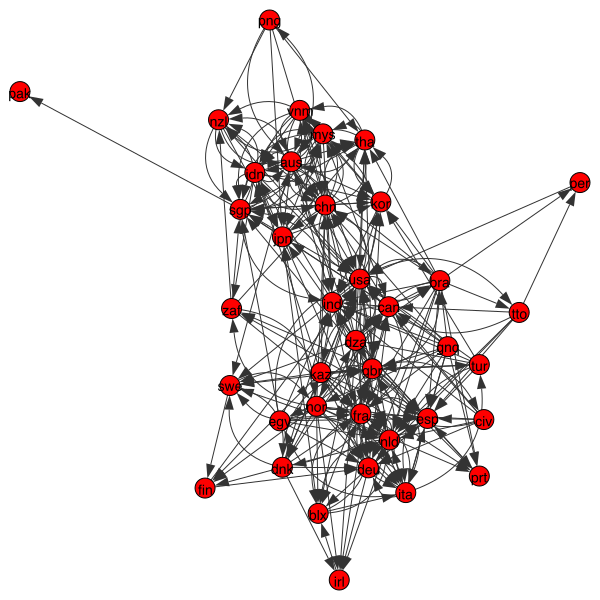

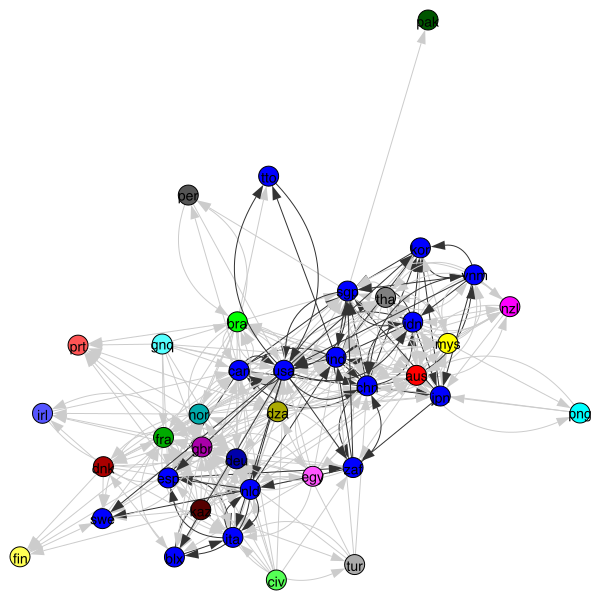

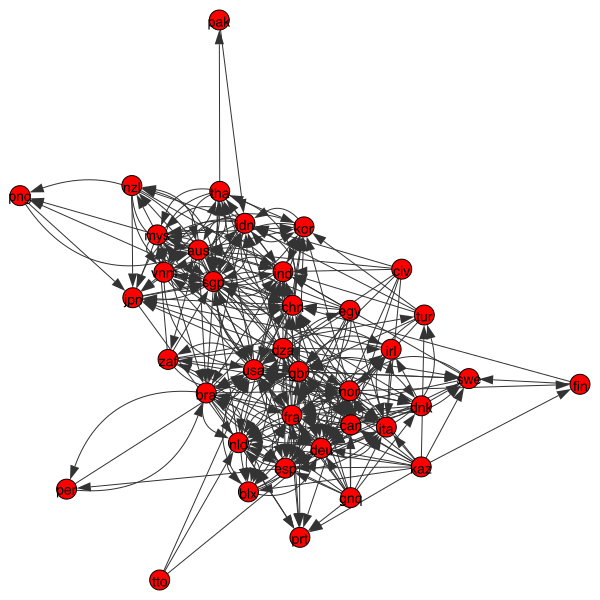

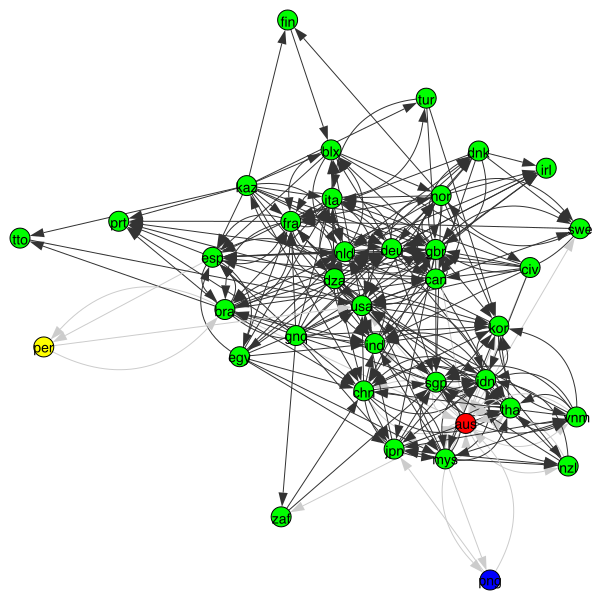

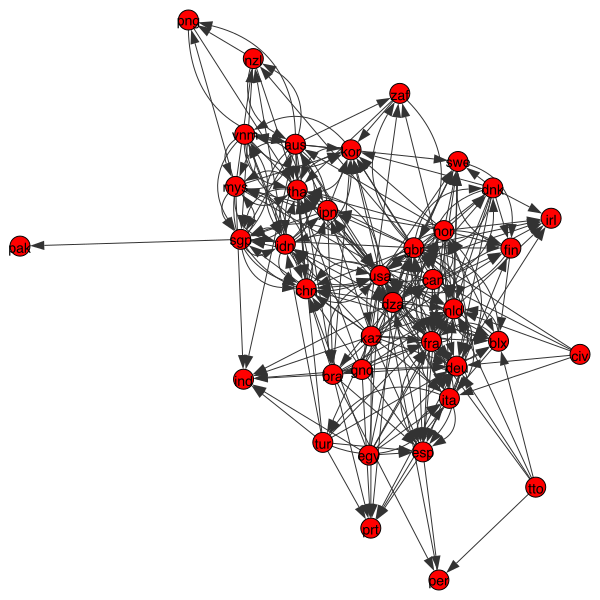

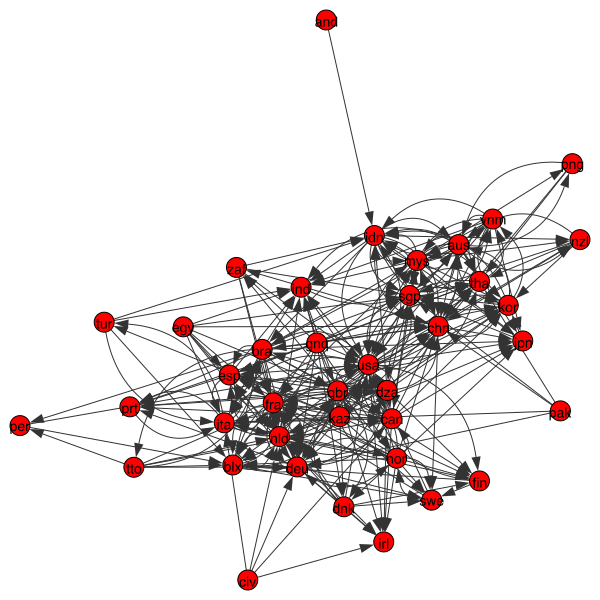

In [37]:
ig.plot(cmm_2008.as_clustering(), "top_10_oil_2008.png")
ig.plot(cmm_2009.as_clustering(), "top_10_oil_2009.png")
ig.plot(cmm_2010.as_clustering(), "top_10_oil_2010.png")
ig.plot(cmm_2011.as_clustering(), "top_10_oil_2011.png")
ig.plot(cmm_2012.as_clustering(), "top_10_oil_2012.png")
ig.plot(cmm_2013.as_clustering(), "top_10_oil_2013.png")
ig.plot(cmm_2014.as_clustering(), "top_10_oil_2014.png")

In [15]:
mem_2008 = zip(graph_2008.vs['name'], cmm_2008.as_clustering().membership)
mem_2009 = zip(graph_2009.vs['name'], cmm_2009.as_clustering().membership)
mem_2010 = zip(graph_2010.vs['name'], cmm_2010.as_clustering().membership)
mem_2011 = zip(graph_2011.vs['name'], cmm_2011.as_clustering().membership)
mem_2012 = zip(graph_2012.vs['name'], cmm_2012.as_clustering().membership)
mem_2013 = zip(graph_2013.vs['name'], cmm_2013.as_clustering().membership)
mem_2014 = zip(graph_2014.vs['name'], cmm_2014.as_clustering().membership)

In [16]:
#now need mean in-degrees of those communities
#assign community index to each node for each year 

In [17]:
#use a line like this to drop any nodes that appear in the network but not in the DF (maybe connected to but not from)
#mem_2008 = [i for i in mem_2008 if i[0] in sum_2008['origin'].values]

In [18]:
#DF of summed import values for each year, sorted by alphabet
sum_2008 = filtered[filtered['year'] == 2008].groupby('origin').sum().reset_index().sort_values('origin')
mem_2008 = [i for i in mem_2008 if i[0] in sum_2008['origin'].values]
sum_2008['comm'] = zip(*sorted(mem_2008))[1]
comm_wealth_2008 = sum_2008.groupby('comm').mean().reset_index()

sum_2009 = filtered[filtered['year'] == 2009].groupby('origin').sum().reset_index().sort_values('origin')
mem_2009 = [i for i in mem_2009 if i[0] in sum_2009['origin'].values]
sum_2009['comm'] = zip(*sorted(mem_2009))[1]
comm_wealth_2009 = sum_2009.groupby('comm').mean().reset_index()

sum_2010 = filtered[filtered['year'] == 2010].groupby('origin').sum().reset_index().sort_values('origin')
mem_2010 = [i for i in mem_2010 if i[0] in sum_2010['origin'].values]
sum_2010['comm'] = zip(*sorted(mem_2010))[1]
comm_wealth_2010 = sum_2010.groupby('comm').mean().reset_index()

sum_2011 = filtered[filtered['year'] == 2011].groupby('origin').sum().reset_index().sort_values('origin')
mem_2011 = [i for i in mem_2011 if i[0] in sum_2011['origin'].values]
sum_2011['comm'] = zip(*sorted(mem_2011))[1]
comm_wealth_2011 = sum_2011.groupby('comm').mean().reset_index()

sum_2012 = filtered[filtered['year'] == 2012].groupby('origin').sum().reset_index().sort_values('origin')
mem_2012 = [i for i in mem_2012 if i[0] in sum_2012['origin'].values]
sum_2012['comm'] = zip(*sorted(mem_2012))[1]
comm_wealth_2012 = sum_2012.groupby('comm').mean().reset_index()

sum_2013 = filtered[filtered['year'] == 2013].groupby('origin').sum().reset_index().sort_values('origin')
mem_2013 = [i for i in mem_2013 if i[0] in sum_2013['origin'].values]
sum_2013['comm'] = zip(*sorted(mem_2013))[1]
comm_wealth_2013 = sum_2013.groupby('comm').mean().reset_index()

sum_2014 = filtered[filtered['year'] == 2014].groupby('origin').sum().reset_index().sort_values('origin')
mem_2014 = [i for i in mem_2014 if i[0] in sum_2014['origin'].values]
sum_2014['comm'] = zip(*sorted(mem_2014))[1]
comm_wealth_2014 = sum_2014.groupby('comm').mean().reset_index()


In [19]:
#now need to assign the appropriate value to each node for its community
col_wealth_2008 = []
for i in sum_2008['comm']:
    col_wealth_2008.append(comm_wealth_2008[comm_wealth_2008['comm'] == i]['import_val'].values[0])
sum_2008['comm_wealth'] = col_wealth_2008

col_wealth_2009 = []
for i in sum_2009['comm']:
    col_wealth_2009.append(comm_wealth_2009[comm_wealth_2009['comm'] == i]['import_val'].values[0])
sum_2009['comm_wealth'] = col_wealth_2009

col_wealth_2010 = []
for i in sum_2010['comm']:
    col_wealth_2010.append(comm_wealth_2010[comm_wealth_2010['comm'] == i]['import_val'].values[0])
sum_2010['comm_wealth'] = col_wealth_2010

col_wealth_2011 = []
for i in sum_2011['comm']:
    col_wealth_2011.append(comm_wealth_2011[comm_wealth_2011['comm'] == i]['import_val'].values[0])
sum_2011['comm_wealth'] = col_wealth_2011

col_wealth_2012 = []
for i in sum_2012['comm']:
    col_wealth_2012.append(comm_wealth_2012[comm_wealth_2012['comm'] == i]['import_val'].values[0])
sum_2012['comm_wealth'] = col_wealth_2012

col_wealth_2013 = []
for i in sum_2013['comm']:
    col_wealth_2013.append(comm_wealth_2013[comm_wealth_2013['comm'] == i]['import_val'].values[0])
sum_2013['comm_wealth'] = col_wealth_2013

col_wealth_2014 = []
for i in sum_2014['comm']:
    col_wealth_2014.append(comm_wealth_2014[comm_wealth_2014['comm'] == i]['import_val'].values[0])
sum_2014['comm_wealth'] = col_wealth_2014

In [20]:
#now need to assemble plots
#need a single DF with all the data 
sum_2008['year'] = 2008
sum_2009['year'] = 2009
sum_2010['year'] = 2010
sum_2011['year'] = 2011
sum_2012['year'] = 2012
sum_2013['year'] = 2013
sum_2014['year'] = 2014

In [21]:
all_df = sum_2008.append([sum_2009, sum_2010,sum_2011,sum_2012,sum_2013,sum_2014])

In [22]:
all_df = all_df.sort_values(['origin','year'])

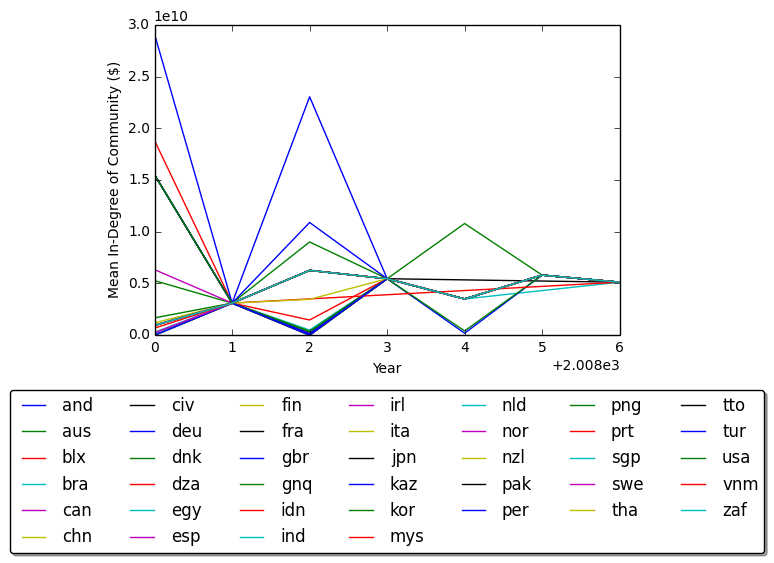

In [23]:
for i in all_df['origin'].unique():
    
    plt.plot(all_df[all_df['origin'] == i]['year'],all_df[all_df['origin'] == i]['comm_wealth'], label = i)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Mean In-Degree of Community ($)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.15),
          fancybox=True, shadow=True, ncol=7)

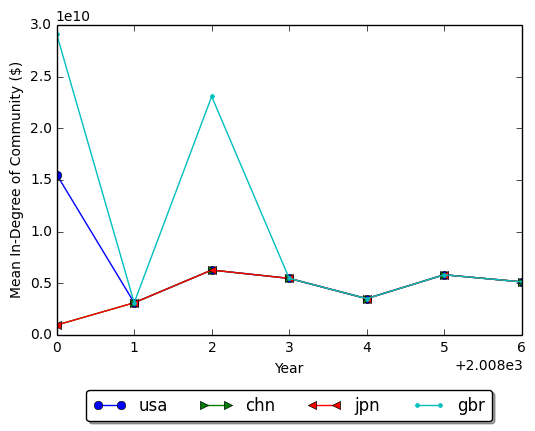

In [49]:

plt.plot(all_df[all_df['origin'] == 'usa']['year'],all_df[all_df['origin'] == 'usa']['comm_wealth'], label = 'usa', marker = 'o')
plt.plot(all_df[all_df['origin'] == 'chn']['year'],all_df[all_df['origin'] == 'chn']['comm_wealth'], label = 'chn', marker = '>')
plt.plot(all_df[all_df['origin'] == 'jpn']['year'],all_df[all_df['origin'] == 'jpn']['comm_wealth'], label = 'jpn', marker = '<')
plt.plot(all_df[all_df['origin'] == 'gbr']['year'],all_df[all_df['origin'] == 'gbr']['comm_wealth'], label = 'gbr', marker = '.')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Mean In-Degree of Community ($)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -.15),
          fancybox=True, shadow=True, ncol=7)